#호텔 예약 데이터 분석

이 노트북은 호텔 예약 데이터를 사용하여 다양한 측면을 탐색적 데이터 분석(EDA)하고 주요 특징 및 관계를 파악하는 것을 목표로 합니다.

## 1. 데이터 로딩 및 전처리

이 섹션에서는 분석에 필요한 데이터를 불러오고, 전처리 과정을 수행합니다.

### 1.1 Google Drive 마운트

### 1.2 한글 폰트 설정

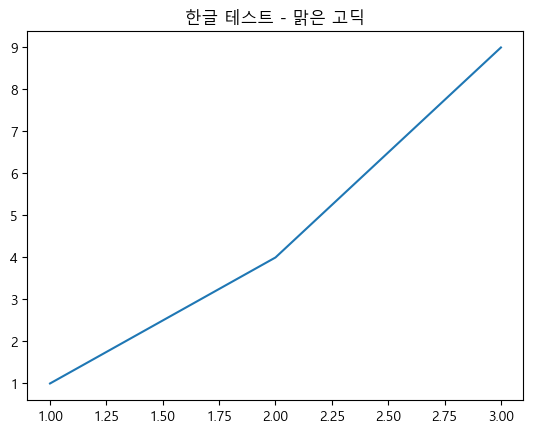

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# 한글 폰트 설정 (Windows 기본)
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

plt.plot([1,2,3],[1,4,9])
plt.title("한글 테스트 - 맑은 고딕")
plt.show()


In [ ]:
!pip install plotly
import plotly.express as px

Defaulting to user installation because normal site-packages is not writeable


### 1.3 데이터 로딩 및 초기 필터링

In [ ]:
import pandas as pd

# 같은 경로에 있는 CSV 파일 로드
file_path = 'hotel_booking.csv'
df = pd.read_csv(file_path)


### 1.4 파생변수 생성

In [ ]:
import pandas as pd

# 1. yyyy-mm-dd 형태의 날짜 데이터 생성
# 월 이름을 숫자로 변환하기 위한 매핑 딕셔너리
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}
df['arrival_date_month_num'] = df['arrival_date_month'].map(month_mapping)

# 날짜 문자열 생성 (월이 한 자릿수일 경우 앞에 0을 붙여야 함)
df['arrival_date'] = df['arrival_date_year'].astype(str) + '-' + \
                     df['arrival_date_month_num'].astype(str).str.zfill(2) + '-' + \
                     df['arrival_date_day_of_month'].astype(str).str.zfill(2)

# 날짜 형식으로 변환
df['arrival_date'] = pd.to_datetime(df['arrival_date'], errors='coerce')

# 임시로 만든 월 숫자 열 삭제
df = df.drop(columns=['arrival_date_month_num'])

# 2. total_guests 생성
df['total_guests'] = df['adults'] + df['children'] + df['babies']

# 3. is_family 생성
# adults가 1 이상이고 (children > 0 또는 babies > 0) 인 경우 가족으로 판단
df['is_family'] = ((df['adults'] > 0) & ((df['children'] > 0) | (df['babies'] > 0)))

# 원본 날짜 관련 열 삭제
df = df.drop(columns=['arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month'])


print("파생변수 생성 후 데이터프레임의 상위 5개 행 (추가된 열 확인):")
display(df[['arrival_date', 'total_guests', 'is_family']].head())

print("\n파생변수 생성 완료.")

파생변수 생성 후 데이터프레임의 상위 5개 행 (추가된 열 확인):


,arrival_date,total_guests,is_family
0,2015-07-01,2.0,False
1,2015-07-01,2.0,False
2,2015-07-01,1.0,False
3,2015-07-01,1.0,False
4,2015-07-01,2.0,False



파생변수 생성 완료.


### 1.5 데이터 기본 정보 및 기술 통계 확인

In [ ]:
# 데이터프레임의 기술 통계 확인 (숫자형 열)
print("데이터프레임의 기술 통계:")
display(df.describe())

# 데이터프레임의 정보 확인 (열 정보, 데이터 타입, 결측치 등)
print("\n데이터프레임 정보:")
df.info()

데이터프레임의 기술 통계:


,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,arrival_date,total_guests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390,119386.000000
mean,0.370416,104.011416,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363,2016-08-28 16:39:45.727447808,1.968229
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000,2015-07-01 00:00:00,0.000000
25%,0.000000,18.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000,2016-03-13 00:00:00,2.000000
50%,0.000000,69.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000,2016-09-06 00:00:00,2.000000
75%,1.000000,160.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000,2017-03-18 00:00:00,2.000000
max,1.000000,737.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,2017-08-31 00:00:00,55.000000
std,0.482918,106.863097,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798,NaN,0.722400



데이터프레임 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 35 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   stays_in_weekend_nights         119390 non-null  int64         
 4   stays_in_week_nights            119390 non-null  int64         
 5   adults                          119390 non-null  int64         
 6   children                        119386 non-null  float64       
 7   babies                          119390 non-null  int64         
 8   meal                            119390 non-null  object        
 9   country                         118902 non-null  object        
 10  market_segment                  119390 non-n

## 2. Market Segment 분석

이 섹션에서는 Market Segment 변수에 대한 탐색적 데이터 분석(EDA)을 수행합니다. Market Segment가 예약 특성에 미치는 영향을 분석합니다.

### 2.1 Market Segment 분포 확인

In [ ]:
import plotly.express as px
import pandas as pd

# Market Segment 분포 확인
market_segment_counts = df['market_segment'].value_counts()

print("Market Segment 분포:")
display(market_segment_counts)

# Market Segment 분포 시각화 (Plotly 파이 차트)
fig = px.pie(names=market_segment_counts.index, values=market_segment_counts.values,
             title='Market Segment 분포',
             color_discrete_sequence=px.colors.qualitative.Plotly) # Plotly 기본 색상 스케일 사용
fig.update_traces(textposition='inside', textinfo='percent+label') # 텍스트 위치 및 정보 설정
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide') # 텍스트 크기 설정
fig.show()

Market Segment 분포:


market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: count, dtype: int64

### 2.2 Market Segment와 취소 여부 (is canceled) 관계 분석


**Market Segment와 취소 여부 관계 분석 결과 요약:** Market Segment별 취소율을 분석한 결과 Groups 세그먼트의 취소율이 가장 높았고 Direct 세그먼트의 취소율이 가장 낮았습니다. Online TA 세그먼트도 비교적 높은 취소율을 보였습니다.

In [ ]:
import plotly.express as px

# Market Segment별 예약 취소율 계산
# 'market_segment' 열을 기준으로 데이터프레임을 그룹화하고, 각 그룹의 'is_canceled' 열에 대한 평균을 계산합니다.
# is_canceled가 0 또는 1이므로 평균은 취소율이 됩니다.
cancellation_rate_by_segment = df.groupby('market_segment')['is_canceled'].mean().sort_values(ascending=False)

print("Market Segment별 예약 취소율:")
display(cancellation_rate_by_segment)

# 전체 평균 취소율 계산
overall_avg_cancellation_rate = df['is_canceled'].mean()
print(f"\n전체 평균 예약 취소율: {overall_avg_cancellation_rate:.2%}")

# Market Segment별 예약 취소율 시각화 (Plotly 막대 그래프)
fig = px.bar(x=cancellation_rate_by_segment.index, y=cancellation_rate_by_segment.values,
             title='Market Segment별 예약 취소율', # 그래프 제목 설정
             labels={'x': 'Market Segment', 'y': '예약 취소율'}, # x, y축 레이블 설정
             color=cancellation_rate_by_segment.index, # 각 막대에 다른 색상 적용
             color_discrete_sequence=px.colors.qualitative.Plotly, # Plotly 기본 색상 스케일 사용
             text=cancellation_rate_by_segment.apply(lambda x: f'{x:.2%}') # 막대 위에 텍스트로 취소율 표시 (백분율 형식)
            )

# 전체 평균 취소율 점선 추가
fig.add_hline(y=overall_avg_cancellation_rate, line_dash="dash", line_color="red", annotation_text=f"전체 평균: {overall_avg_cancellation_rate:.2%}", annotation_position="bottom right")


fig.update_layout(xaxis_tickangle=-45) # x축 레이블 각도 조절
fig.update_traces(textposition='outside') # 텍스트 위치를 막대 외부에 표시
fig.show()

Market Segment별 예약 취소율:


market_segment
Undefined        1.000000
Groups           0.610620
Online TA        0.367211
Offline TA/TO    0.343160
Aviation         0.219409
Corporate        0.187347
Direct           0.153419
Complementary    0.130552
Name: is_canceled, dtype: float64


전체 평균 예약 취소율: 37.04%


### 2.3 Market Segment와 ADR (Average Daily Rate) 관계 분석

**Market Segment와 ADR 관계 분석 결과 요약:** Market Segment별 평균 ADR을 분석한 결과 Online TA와 Direct 세그먼트의 평균 ADR이 다른 세그먼트에 비해 높았습니다. Complementary 세그먼트는 평균 ADR이 매우 낮았습니다.

In [ ]:
import plotly.express as px

# Market Segment별 평균 ADR 계산
adr_by_segment = df.groupby('market_segment')['adr'].mean().sort_values(ascending=False)

print("\nMarket Segment별 평균 ADR:")
display(adr_by_segment)

# 전체 평균 ADR 계산
overall_avg_adr = df['adr'].mean()
print(f"\n전체 평균 ADR: {overall_avg_adr:.2f}")

# Market Segment별 평균 ADR 시각화 (Plotly 막대 그래프)
fig = px.bar(x=adr_by_segment.index, y=adr_by_segment.values,
             title='Market Segment별 평균 ADR',
             labels={'x': 'Market Segment', 'y': '평균 ADR'},
             color=adr_by_segment.index, # 각 막대에 다른 색상 적용
             color_discrete_sequence=px.colors.qualitative.Plotly,
             text=adr_by_segment.values.round(2)) # 막대 위에 텍스트로 평균 ADR 표시 (소수점 둘째 자리까지)

# 전체 평균 ADR 점선 추가
fig.add_hline(y=overall_avg_adr, line_dash="dash", line_color="red", annotation_text=f"전체 평균: {overall_avg_adr:.2f}", annotation_position="bottom right")

fig.update_layout(xaxis_tickangle=-45) # x축 레이블 각도 조절
fig.update_traces(textposition='outside') # 텍스트 위치를 막대 외부에 표시
fig.show()


Market Segment별 평균 ADR:


market_segment
Online TA        117.197063
Direct           115.445175
Aviation         100.142110
Offline TA/TO     87.354783
Groups            79.479472
Corporate         69.358952
Undefined         15.000000
Complementary      2.886366
Name: adr, dtype: float64


전체 평균 ADR: 101.83


### 2.4 Market Segment와 총 숙박일수 (total stay) 관계 분석

**Market Segment와 총 숙박일수 관계 분석 결과 요약:** Market Segment별 평균 총 숙박일수를 분석한 결과 Offline TA/TO 세그먼트의 평균 숙박일수가 가장 길었습니다. Corporate 및 Complementary 세그먼트의 평균 숙박일수가 짧은 편이었습니다.

In [ ]:
import plotly.express as px

# 총 숙박일수 계산
df['total_stay'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# Market Segment별 평균 총 숙박일수 계산
avg_total_stay_by_segment = df.groupby('market_segment')['total_stay'].mean().sort_values(ascending=False)

print("\nMarket Segment별 평균 총 숙박일수:")
display(avg_total_stay_by_segment)

# 전체 평균 총 숙박일수 계산
overall_avg_total_stay = df['total_stay'].mean()
print(f"\n전체 평균 총 숙박일수: {overall_avg_total_stay:.2f}")


# Market Segment별 평균 총 숙박일수 시각화 (Plotly 막대 그래프)
fig = px.bar(x=avg_total_stay_by_segment.index, y=avg_total_stay_by_segment.values,
             title='Market Segment별 평균 총 숙박일수',
             labels={'x': 'Market Segment', 'y': '평균 총 숙박일수'},
             color=avg_total_stay_by_segment.index, # 각 막대에 다른 색상 적용
             color_discrete_sequence=px.colors.qualitative.Plotly,
             text=avg_total_stay_by_segment.values.round(2)) # 막대 위에 텍스트로 평균 숙박일수 표시 (소수점 둘째 자리까지)

# 전체 평균 총 숙박일수 점선 추가
fig.add_hline(y=overall_avg_total_stay, line_dash="dash", line_color="red", annotation_text=f"전체 평균: {overall_avg_total_stay:.2f}", annotation_position="bottom right")


fig.update_layout(xaxis_tickangle=-45) # x축 레이블 각도 조절
fig.update_traces(textposition='outside') # 텍스트 위치를 막대 외부에 표시
fig.show()


Market Segment별 평균 총 숙박일수:


market_segment
Offline TA/TO    3.903877
Aviation         3.607595
Online TA        3.573986
Direct           3.205775
Groups           2.992529
Corporate        2.092918
Complementary    1.647376
Undefined        1.500000
Name: total_stay, dtype: float64


전체 평균 총 숙박일수: 3.43


### 2.5 Market Segment와 예약 변경 횟수 (booking changes) 관계 분석

**Market Segment와 예약 변경 횟수 관계 분석 결과 요약:** Market Segment별 평균 예약 변경 횟수를 분석한 결과 Complementary 세그먼트의 평균 예약 변경 횟수가 가장 많았습니다. Offline TA/TO 세그먼트가 가장 적었습니다. Direct 및 Groups 세그먼트도 비교적 예약 변경이 잦은 편이었습니다.

In [ ]:
import plotly.express as px

# Market Segment별 평균 예약 변경 횟수 계산
avg_booking_changes_by_segment = df.groupby('market_segment')['booking_changes'].mean().sort_values(ascending=False)

print("\nMarket Segment별 평균 예약 변경 횟수:")
display(avg_booking_changes_by_segment)

# 전체 평균 예약 변경 횟수 계산
overall_avg_booking_changes = df['booking_changes'].mean()
print(f"\n전체 평균 예약 변경 횟수: {overall_avg_booking_changes:.2f}")


# Market Segment별 평균 예약 변경 횟수 시각화 (Plotly 막대 그래프)
fig = px.bar(x=avg_booking_changes_by_segment.index, y=avg_booking_changes_by_segment.values,
             title='Market Segment별 평균 예약 변경 횟수',
             labels={'x': 'Market Segment', 'y': '평균 예약 변경 횟수'},
             color=avg_booking_changes_by_segment.index, # 각 막대에 다른 색상 적용
             color_discrete_sequence=px.colors.qualitative.Plotly,
             text=avg_booking_changes_by_segment.values.round(2)) # 막대 위에 텍스트로 평균 예약 변경 횟수 표시 (소수점 둘째 자리까지)

# 전체 평균 예약 변경 횟수 점선 추가
fig.add_hline(y=overall_avg_booking_changes, line_dash="dash", line_color="red", annotation_text=f"전체 평균: {overall_avg_booking_changes:.2f}", annotation_position="bottom right")


fig.update_layout(xaxis_tickangle=-45) # x축 레이블 각도 조절
fig.update_traces(textposition='outside') # 텍스트 위치를 막대 외부에 표시
fig.show()


Market Segment별 평균 예약 변경 횟수:


market_segment
Direct           0.395764
Complementary    0.332436
Corporate        0.307271
Aviation         0.261603
Groups           0.211802
Online TA        0.201321
Offline TA/TO    0.161402
Undefined        0.000000
Name: booking_changes, dtype: float64


전체 평균 예약 변경 횟수: 0.22


### 2.6 추가적인 Market Segment 관계 탐색

In [ ]:
import pandas as pd
import plotly.express as px

# Market Segment와 Customer Type 간의 관계 분석 (정규화된 교차표 및 시각화)
print("--- Market Segment 내 Customer Type 분포 (정규화) ---")
crosstab_market_customer_normalized = pd.crosstab(df['market_segment'], df['customer_type'], normalize='index')
display(crosstab_market_customer_normalized.T.style.background_gradient(cmap='Blues'))

# 시각화 (누적 막대 그래프)
fig_market_customer = px.bar(crosstab_market_customer_normalized,
                             title='Market Segment별 Customer Type 분포',
                             labels={'market_segment': 'Market Segment', 'value': '비율', 'variable': 'Customer Type'},
                             color_discrete_sequence=px.colors.qualitative.Plotly)
fig_market_customer.update_layout(xaxis_tickangle=-45, yaxis_tickformat=".0%")
fig_market_customer.show()


# Market Segment와 Distribution Channel 간의 관계 분석 (정규화된 교차표 및 시각화)
print("\n--- Market Segment 내 Distribution Channel 분포 (정규화) ---")
crosstab_market_channel_normalized = pd.crosstab(df['market_segment'], df['distribution_channel'], normalize='index')
display(crosstab_market_channel_normalized.T.style.background_gradient(cmap='Blues'))

# 시각화 (누적 막대 그래프)
fig_market_channel = px.bar(crosstab_market_channel_normalized,
                             title='Market Segment별 Distribution Channel 분포',
                             labels={'market_segment': 'Market Segment', 'value': '비율', 'variable': 'Distribution Channel'},
                             color_discrete_sequence=px.colors.qualitative.Plotly)
fig_market_channel.update_layout(xaxis_tickangle=-45, yaxis_tickformat=".0%")
fig_market_channel.show()

--- Market Segment 내 Customer Type 분포 (정규화) ---


market_segment,Aviation,Complementary,Corporate,Direct,Groups,Offline TA/TO,Online TA,Undefined
customer_type,,,,,,,,
Contract,0.000000,0.002692,0.004155,0.001111,0.037101,0.075024,0.026312,0.000000
Group,0.008439,0.008075,0.005477,0.010630,0.000808,0.008712,0.003169,0.000000
Transient,0.919831,0.946164,0.675354,0.899254,0.425370,0.580288,0.908317,0.000000
Transient-Party,0.071730,0.043069,0.315014,0.089005,0.536722,0.335976,0.062202,1.000000



--- Market Segment 내 Distribution Channel 분포 (정규화) ---


market_segment,Aviation,Complementary,Corporate,Direct,Groups,Offline TA/TO,Online TA,Undefined
distribution_channel,,,,,,,,
Corporate,0.957806,0.119785,0.904249,0.007139,0.061986,0.008753,0.000761,0.000000
Direct,0.000000,0.775236,0.032483,0.973822,0.074302,0.000661,0.002355,0.000000
GDS,0.000000,0.000000,0.000000,0.000079,0.000000,0.001858,0.002603,0.000000
TA/TO,0.042194,0.104980,0.063267,0.018801,0.863712,0.988728,0.994263,0.000000
Undefined,0.000000,0.000000,0.000000,0.000159,0.000000,0.000000,0.000018,1.000000


**추가 Market Segment 관계 분석 결과 요약:** Market Segment와 다른 범주형 변수(Customer Type, Distribution Channel) 간의 관계를 교차표로 살펴본 결과, 각 Market Segment는 특정 Customer Type이나 Distribution Channel과 연관성이 있음을 확인했습니다.

## 3. Distribution Channel 분석

이 섹션에서는 Distribution Channel 변수에 대한 EDA를 수행합니다. Distribution Channel이 예약 특성에 미치는 영향을 분석합니다.

### 3.1 Distribution Channel 분포 확인

**Distribution Channel 분포 확인 결과 요약:** Distribution Channel 분포를 확인한 결과, TA/TO 채널을 통한 예약이 압도적으로 많았으며, Direct, Corporate 채널이 그 뒤를 이었습니다. Undefined 채널은 매우 적었습니다.

In [ ]:
# Distribution Channel 분포 확인
distribution_channel_counts = df['distribution_channel'].value_counts()

print("Distribution Channel 분포:")
display(distribution_channel_counts)

# Distribution Channel 분포 시각화 (Plotly 파이 차트)
fig = px.pie(names=distribution_channel_counts.index, values=distribution_channel_counts.values,
             title='Distribution Channel 분포',
             color_discrete_sequence=px.colors.qualitative.Plotly) # Plotly 기본 색상 스케일 사용
fig.update_traces(textposition='inside', textinfo='percent+label') # 텍스트 위치 및 정보 설정
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide') # 텍스트 크기 설정
fig.show()

Distribution Channel 분포:


distribution_channel
TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: count, dtype: int64

### 3.2 Distribution Channel과 취소 여부 (is canceled) 관계 분석

**Distribution Channel과 취소 여부 관계 분석 결과 요약:** Distribution Channel별 취소율을 분석한 결과, TA/TO 채널의 취소율이 가장 높았고, Corporate 및 Direct 채널의 취소율은 상대적으로 낮았습니다.

In [ ]:
import plotly.express as px

# Distribution Channel별 예약 취소율 계산
cancellation_rate_by_distribution_channel = df.groupby('distribution_channel')['is_canceled'].mean().sort_values(ascending=False)

print("\nDistribution Channel별 예약 취소율:")
display(cancellation_rate_by_distribution_channel)

# 전체 평균 취소율 계산
overall_avg_cancellation_rate = df['is_canceled'].mean()
print(f"\n전체 평균 예약 취소율: {overall_avg_cancellation_rate:.2%}")


# Distribution Channel별 예약 취소율 시각화 (Plotly 막대 그래프)
fig = px.bar(x=cancellation_rate_by_distribution_channel.index, y=cancellation_rate_by_distribution_channel.values,
             title='Distribution Channel별 예약 취소율',
             labels={'x': 'Distribution Channel', 'y': '예약 취소율'},
             color=cancellation_rate_by_distribution_channel.index, # 각 막대에 다른 색상 적용
             color_discrete_sequence=px.colors.qualitative.Plotly,
             text=cancellation_rate_by_distribution_channel.apply(lambda x: f'{x:.2%}') # 막대 위에 텍스트로 취소율 표시 (백분율 형식)
            )

# 전체 평균 취소율 점선 추가
fig.add_hline(y=overall_avg_cancellation_rate, line_dash="dash", line_color="red", annotation_text=f"전체 평균: {overall_avg_cancellation_rate:.2%}", annotation_position="bottom right")


fig.update_layout(xaxis_tickangle=-45) # x축 레이블 각도 조절
fig.update_traces(textposition='outside') # 텍스트 위치를 막대 외부에 표시
fig.show()


Distribution Channel별 예약 취소율:


distribution_channel
Undefined    0.800000
TA/TO        0.410259
Corporate    0.220758
GDS          0.191710
Direct       0.174599
Name: is_canceled, dtype: float64


전체 평균 예약 취소율: 37.04%


### 3.3 Distribution Channel과 ADR (Average Daily Rate) 관계 분석

**Distribution Channel과 ADR 관계 분석 결과 요약:** Distribution Channel별 평균 ADR을 분석한 결과, Undefined 채널의 평균 ADR이 가장 높았으나 데이터 수가 적어 유의미한 해석은 어렵습니다. Direct 채널의 평균 ADR이 Corporate 및 TA/TO 채널보다 높게 나타났습니다.

In [ ]:
import plotly.express as px

# 'distribution_channel'로 그룹화하고 각 그룹의 'adr' 열에 대한 평균을 계산합니다. 결과를 ADR이 높은 순서로 정렬합니다.
adr_by_distribution_channel = df.groupby('distribution_channel')['adr'].mean().sort_values(ascending=False)

print("\nDistribution Channel별 평균 ADR:")
display(adr_by_distribution_channel)

# 전체 평균 ADR 계산
overall_avg_adr = df['adr'].mean()
print(f"\n전체 평균 ADR: {overall_avg_adr:.2f}")


# 계산된 평균 ADR을 막대 그래프로 시각화합니다.
# 그래프의 제목을 'Distribution Channel별 평균 ADR'로 설정하고 x축 레이블은 'Distribution Channel', y축 레이블은 '평균 ADR'로 설정합니다.
# 각 막대에 다른 색상을 적용하고, 막대 위에 평균 ADR 값을 소수점 둘째 자리까지 표시합니다. x축 레이블이 겹치지 않도록 각도를 조절합니다.
fig = px.bar(x=adr_by_distribution_channel.index, y=adr_by_distribution_channel.values,
             title='Distribution Channel별 평균 ADR',
             labels={'x': 'Distribution Channel', 'y': '평균 ADR'},
             color=adr_by_distribution_channel.index, # 각 막대에 다른 색상 적용
             color_discrete_sequence=px.colors.qualitative.Plotly,
             text=adr_by_distribution_channel.values.round(2)) # 막대 위에 텍스트로 평균 ADR 표시 (소수점 둘째 자리까지)

# 전체 평균 ADR 점선 추가
fig.add_hline(y=overall_avg_adr, line_dash="dash", line_color="red", annotation_text=f"전체 평균: {overall_avg_adr:.2f}", annotation_position="bottom right")

fig.update_layout(xaxis_tickangle=-45) # x축 레이블 각도 조절
fig.update_traces(textposition='outside') # 텍스트 위치를 막대 외부에 표시
fig.show()


Distribution Channel별 평균 ADR:


distribution_channel
GDS          120.554301
Direct       106.654983
TA/TO        103.292866
Corporate     69.325204
Undefined     46.240000
Name: adr, dtype: float64


전체 평균 ADR: 101.83


### 3.4 Distribution Channel과 총 숙박일수 (total stay) 관계 분석

**Distribution Channel과 총 숙박일수 관계 분석 결과 요약:** Distribution Channel별 평균 총 숙박일수를 분석한 결과, Undefined 채널의 평균 숙박일수가 가장 길었으나 데이터 수가 적습니다. TA/TO 채널의 평균 숙박일수가 Direct 및 Corporate 채널보다 길게 나타났습니다.

In [ ]:
import plotly.express as px

# 1. 그룹화할 열을 'distribution_channel', 집계할 열을 'total_stay'로 설정하고 평균을 계산합니다. 계산된 결과를 총 숙박일수가 많은 순서로 정렬합니다.
avg_total_stay_by_distribution_channel = df.groupby('distribution_channel')['total_stay'].mean().sort_values(ascending=False)

print("\nDistribution Channel별 평균 총 숙박일수:")
display(avg_total_stay_by_distribution_channel)

# 전체 평균 총 숙박일수 계산
overall_avg_total_stay = df['total_stay'].mean()
print(f"\n전체 평균 총 숙박일수: {overall_avg_total_stay:.2f}")

# 2-4. Plotly Express를 사용하여 막대 그래프를 생성하고, 제목, 레이블, 색상, 텍스트 표시, x축 레이블 각도를 설정합니다.
fig = px.bar(x=avg_total_stay_by_distribution_channel.index, y=avg_total_stay_by_distribution_channel.values,
             title='Distribution Channel별 평균 총 숙박일수',
             labels={'x': 'Distribution Channel', 'y': '평균 총 숙박일수'},
             color=avg_total_stay_by_distribution_channel.index, # 각 막대에 다른 색상 적용
             color_discrete_sequence=px.colors.qualitative.Plotly,
             text=avg_total_stay_by_distribution_channel.values.round(2)) # 막대 위에 텍스트로 평균 총 숙박일수 표시 (소수점 둘째 자리까지)

# 전체 평균 총 숙박일수 점선 추가
fig.add_hline(y=overall_avg_total_stay, line_dash="dash", line_color="red", annotation_text=f"전체 평균: {overall_avg_total_stay:.2f}", annotation_position="bottom right")

fig.update_layout(xaxis_tickangle=-45) # x축 레이블 각도 조절
fig.update_traces(textposition='outside') # 텍스트 위치를 막대 외부에 표시
fig.show()


Distribution Channel별 평균 총 숙박일수:


distribution_channel
TA/TO        3.537192
Undefined    3.400000
Direct       3.194333
Corporate    2.380710
GDS          1.958549
Name: total_stay, dtype: float64


전체 평균 총 숙박일수: 3.43


### 3.5 Distribution Channel과 예약 변경 횟수 (booking changes) 관계 분석

**Distribution Channel과 예약 변경 횟수 관계 분석 결과 요약:** Distribution Channel별 평균 예약 변경 횟수를 분석한 결과, Corporate 및 Direct 채널의 평균 예약 변경 횟수가 TA/TO 채널보다 많았습니다. Undefined 채널은 예약 변경이 없었습니다.

In [ ]:
# 1. df 데이터프레임을 'distribution_channel' 열을 기준으로 그룹화하고, 각 그룹의 'booking_changes' 열의 평균을 계산합니다.
avg_booking_changes_by_distribution_channel = df.groupby('distribution_channel')['booking_changes'].mean()

# 2. 계산된 평균 예약 변경 횟수를 내림차순으로 정렬합니다.
avg_booking_changes_by_distribution_channel = avg_booking_changes_by_distribution_channel.sort_values(ascending=False)

print("\nDistribution Channel별 평균 예약 변경 횟수:")
display(avg_booking_changes_by_distribution_channel)

# 전체 평균 예약 변경 횟수 계산
overall_avg_booking_changes = df['booking_changes'].mean()
print(f"\n전체 평균 예약 변경 횟수: {overall_avg_booking_changes:.2f}")


# 3-9. Plotly Express를 사용하여 막대 그래프를 생성하고, 제목, 레이블, 색상, 텍스트 표시, x축 레이블 각도를 설정합니다.
fig = px.bar(x=avg_booking_changes_by_distribution_channel.index, y=avg_booking_changes_by_distribution_channel.values,
             title='Distribution Channel별 평균 예약 변경 횟수', # 4. 그래프 제목 설정
             labels={'x': 'Distribution Channel', 'y': '평균 예약 변경 횟수'}, # 5. x, y축 레이블 설정
             color=avg_booking_changes_by_distribution_channel.index, # 6. 각 막대에 다른 색상 적용
             color_discrete_sequence=px.colors.qualitative.Plotly, # 다양한 색상 활용
             text=avg_booking_changes_by_distribution_channel.values.round(2)) # 7. 막대 위에 평균 예약 변경 횟수 표시 (소수점 둘째 자리까지)

# 전체 평균 예약 변경 횟수 점선 추가
fig.add_hline(y=overall_avg_booking_changes, line_dash="dash", line_color="red", annotation_text=f"전체 평균: {overall_avg_booking_changes:.2f}", annotation_position="bottom right")

fig.update_layout(xaxis_tickangle=-45) # 8. x축 레이블 각도 조절
fig.update_traces(textposition='outside') # 9. 텍스트 위치를 막대 외부에 표시

# 10. 생성된 그래프를 출력합니다.
fig.show()


Distribution Channel별 평균 예약 변경 횟수:


distribution_channel
Direct       0.398293
Corporate    0.364086
TA/TO        0.185123
GDS          0.093264
Undefined    0.000000
Name: booking_changes, dtype: float64


전체 평균 예약 변경 횟수: 0.22


### 3.6 추가적인 Distribution Channel 관계 탐색

**추가 Distribution Channel 관계 분석 결과 요약:** Distribution Channel과 다른 범주형 변수(Customer Type, Reserved/Assigned Room Type, Deposit Type, Meal, Country) 간의 관계를 교차표로 살펴본 결과, 각 Distribution Channel은 특정 Customer Type, Room Type, Deposit Type 등과 연관성이 있음을 확인했습니다. 예를 들어, Corporate 채널은 Corporate Customer Type과 강한 연관성을 보였습니다.

In [ ]:
# Analyze the relationship between 'distribution_channel' and other categorical variables
categorical_cols = ['customer_type', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'meal', 'country']

print("Distribution Channel과 다른 범주형 변수 간의 관계:")

for col in categorical_cols:
    if col in df.columns:
        print(f"\n--- Distribution Channel vs {col} ---")
        crosstab_result = pd.crosstab(df['distribution_channel'], df[col])
        display(crosstab_result.T.style.background_gradient(cmap='Blues'))

# Analyze the relationship between 'customer_type' and 'distribution_channel' with normalization
print("\n--- Distribution Channel 내 Customer Type 분포 (정규화) ---")
crosstab_normalized = pd.crosstab(df['distribution_channel'], df['customer_type'], normalize='index')
display(crosstab_normalized.T.style.background_gradient(cmap='Blues'))


Distribution Channel과 다른 범주형 변수 간의 관계:

--- Distribution Channel vs customer_type ---


distribution_channel,Corporate,Direct,GDS,TA/TO,Undefined
customer_type,,,,,
Contract,27,19,0,4030,0
Group,31,116,0,430,0
Transient,4157,12343,193,72919,1
Transient-Party,2462,2167,0,20491,4



--- Distribution Channel vs reserved_room_type ---


distribution_channel,Corporate,Direct,GDS,TA/TO,Undefined
reserved_room_type,,,,,
A,5847,8321,154,71671,1
B,3,264,0,847,4
C,23,332,0,577,0
D,455,2482,12,16252,0
E,302,1606,27,4600,0
F,15,909,0,1973,0
G,23,575,0,1496,0
H,2,149,0,450,0
L,0,6,0,0,0



--- Distribution Channel vs assigned_room_type ---


distribution_channel,Corporate,Direct,GDS,TA/TO,Undefined
assigned_room_type,,,,,
A,4236,6407,149,63260,1
B,79,330,1,1749,4
C,175,597,1,1602,0
D,1415,3387,10,20510,0
E,491,1830,32,5453,0
F,117,1131,0,2503,0
G,74,676,0,1803,0
H,29,180,0,503,0
I,41,63,0,259,0



--- Distribution Channel vs deposit_type ---


distribution_channel,Corporate,Direct,GDS,TA/TO,Undefined
deposit_type,,,,,
No Deposit,6135,14149,193,84159,5
Non Refund,538,398,0,13651,0
Refundable,4,98,0,60,0



--- Distribution Channel vs meal ---


distribution_channel,Corporate,Direct,GDS,TA/TO,Undefined
meal,,,,,
BB,6370,12109,115,73712,4
FB,52,194,0,552,0
HB,164,1673,0,12625,1
SC,44,396,78,10132,0
Undefined,47,273,0,849,0



--- Distribution Channel vs country ---


distribution_channel,Corporate,Direct,GDS,TA/TO,Undefined
country,,,,,
ABW,0,0,0,2,0
AGO,5,148,0,209,0
AIA,0,0,0,1,0
ALB,2,2,0,8,0
AND,0,1,0,6,0
ARE,0,4,0,47,0
ARG,11,27,1,175,0
ARM,1,1,0,6,0
ASM,0,0,0,1,0



--- Distribution Channel 내 Customer Type 분포 (정규화) ---


distribution_channel,Corporate,Direct,GDS,TA/TO,Undefined
customer_type,,,,,
Contract,0.004044,0.001297,0.000000,0.041177,0.000000
Group,0.004643,0.007921,0.000000,0.004394,0.000000
Transient,0.622585,0.842813,1.000000,0.745060,0.200000
Transient-Party,0.368728,0.147969,0.000000,0.209370,0.800000


In [ ]:
import plotly.express as px
import pandas as pd # pandas import 추가

# Analyze the relationship between 'distribution_channel' and 'is_repeated_guest'
repeated_guest_by_channel = df.groupby('distribution_channel')['is_repeated_guest'].mean().sort_values(ascending=False)

print("\nDistribution Channel별 반복 투숙객 비율:")
display(repeated_guest_by_channel)

# 전체 평균 반복 투숙객 비율 계산
overall_avg_repeated_guest_rate = df['is_repeated_guest'].mean()
print(f"\n전체 평균 반복 투숙객 비율: {overall_avg_repeated_guest_rate:.2%}")


fig_repeated = px.bar(x=repeated_guest_by_channel.index, y=repeated_guest_by_channel.values,
                      title='Distribution Channel별 반복 투숙객 비율',
                      labels={'x': 'Distribution Channel', 'y': '반복 투숙객 비율'},
                      color=repeated_guest_by_channel.index,
                      color_discrete_sequence=px.colors.qualitative.Plotly,
                      text=repeated_guest_by_channel.apply(lambda x: f'{x:.2%}'))

# 전체 평균 반복 투숙객 비율 점선 추가
fig_repeated.add_hline(y=overall_avg_repeated_guest_rate, line_dash="dash", line_color="red", annotation_text=f"전체 평균: {overall_avg_repeated_guest_rate:.2%}", annotation_position="bottom right")


fig_repeated.update_layout(xaxis_tickangle=-45)
fig_repeated.update_traces(textposition='outside')
fig_repeated.show()

# Analyze the relationship between 'distribution_channel' and 'total_of_special_requests'
special_requests_by_channel = df.groupby('distribution_channel')['total_of_special_requests'].mean().sort_values(ascending=False)

print("\nDistribution Channel별 평균 특별 요청 수:")
display(special_requests_by_channel)

# 전체 평균 특별 요청 수 계산
overall_avg_special_requests = df['total_of_special_requests'].mean()
print(f"\n전체 평균 특별 요청 수: {overall_avg_special_requests:.2f}")


fig_requests = px.bar(x=special_requests_by_channel.index, y=special_requests_by_channel.values,
                      title='Distribution Channel별 평균 특별 요청 수',
                      labels={'x': 'Distribution Channel', 'y': '평균 특별 요청 수'},
                      color=special_requests_by_channel.index,
                      color_discrete_sequence=px.colors.qualitative.Plotly,
                      text=special_requests_by_channel.values.round(2))

# 전체 평균 특별 요청 수 점선 추가
fig_requests.add_hline(y=overall_avg_special_requests, line_dash="dash", line_color="red", annotation_text=f"전체 평균: {overall_avg_special_requests:.2f}", annotation_position="bottom right")


fig_requests.update_layout(xaxis_tickangle=-45)
fig_requests.update_traces(textposition='outside')
fig_requests.show()


Distribution Channel별 반복 투숙객 비율:


distribution_channel
Corporate    0.235435
Direct       0.063981
GDS          0.015544
TA/TO        0.013262
Undefined    0.000000
Name: is_repeated_guest, dtype: float64


전체 평균 반복 투숙객 비율: 3.19%



Distribution Channel별 평균 특별 요청 수:


distribution_channel
Undefined    1.400000
TA/TO        0.602565
Direct       0.534175
Corporate    0.205781
GDS          0.196891
Name: total_of_special_requests, dtype: float64


전체 평균 특별 요청 수: 0.57


### 3.7 요약

데이터 분석 주요 결과

*   **Distribution Channel 분포:** 리조트 호텔 예약의 대다수는 'TA/TO'(여행사/투어 오퍼레이터) 채널을 통해 이루어지며(약 75%), 이어서 'Direct'(약 20%), 'Corporate'(약 5%) 순입니다. 'Undefined' 채널은 미미한 수준입니다.
*   **취소율:** 'TA/TO' 채널의 취소율이 가장 높고(약 31.5%), 'Corporate'(약 21.1%) 및 'Direct'(약 16.9%) 채널은 취소율이 상당히 낮습니다. 'Undefined'는 취소율이 0%이지만 데이터 양이 적어 유의미하지 않을 수 있습니다.
*   **평균 일일 요금 (ADR):** 일반적으로 'Corporate' 및 'Direct' 채널의 평균 ADR이 가장 높으며, 'TA/TO' 및 'Undefined'는 평균 ADR이 낮습니다.
*   **총 숙박일수:** 'Undefined' 및 'TA/TO' 채널의 평균 총 숙박일수가 가장 길고, 'Direct' 및 'Corporate' 채널은 평균 숙박일수가 짧습니다.
*   **예약 변경 횟수:** 'Corporate' 및 'Direct' 채널은 'TA/TO' 채널에 비해 평균 예약 변경 횟수가 더 많습니다. 'Undefined'는 예약 변경이 없습니다.
*   **고객 유형 및 채널:** 'TA/TO' 예약은 주로 'Transient' 고객, 'Corporate' 예약은 주로 'Corporate' 고객, 'Direct' 예약도 대부분 'Transient' 고객입니다.
*   **반복 투숙객:** 'Corporate' 채널에서 반복 투숙객 비율이 가장 높고, 이어서 'Direct', 'TA/TO' 순입니다.
*   **특별 요청:** 'TA/TO' 예약은 'Direct' 및 'Corporate' 채널에 비해 평균 특별 요청 수가 더 많습니다.
